# Media Company Case Study

Problem Statement: A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

In [4]:
# importing necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#importing dataset
media = pd.read_csv("mediacompany.csv")
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [6]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 80 non-null     object 
 1   Views_show           80 non-null     int64  
 2   Visitors             80 non-null     int64  
 3   Views_platform       80 non-null     int64  
 4   Ad_impression        80 non-null     int64  
 5   Cricket_match_india  80 non-null     int64  
 6   Character_A          80 non-null     int64  
 7   Unnamed: 7           0 non-null      float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ KB


In [7]:
media.drop("Unnamed: 7",axis = 1,inplace=True)

In [8]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [9]:
# Converting date object as datetime
media["Date"] = pd.to_datetime(media.Date)

In [10]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [11]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 80 non-null     datetime64[ns]
 1   Views_show           80 non-null     int64         
 2   Visitors             80 non-null     int64         
 3   Views_platform       80 non-null     int64         
 4   Ad_impression        80 non-null     int64         
 5   Cricket_match_india  80 non-null     int64         
 6   Character_A          80 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 4.5 KB


In [12]:
# Deriving "days since the show started"
from datetime import date

d0 = date(2017, 2, 28)
d0= pd.to_datetime(d0)
d1 = media.Date
delta = d1 - d0
media['day']= delta

In [13]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [14]:
media.day = media.day.astype(str)
media.day = media.day.map(lambda x : x[0:2])
media.day = media.day.astype(int)

In [15]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


<AxesSubplot:xlabel='day'>

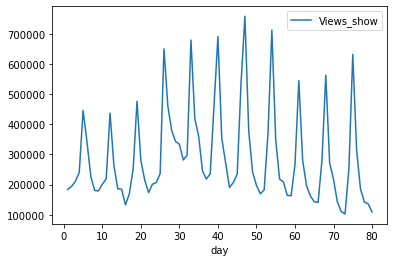

In [16]:
# days vs Views_show
media.plot.line(x="day",y="Views_show")

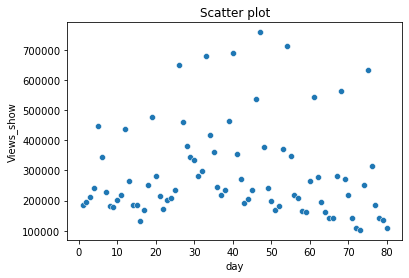

In [17]:
sns.scatterplot(x=media.day,y=media.Views_show)
plt.title("Scatter plot")
plt.show()

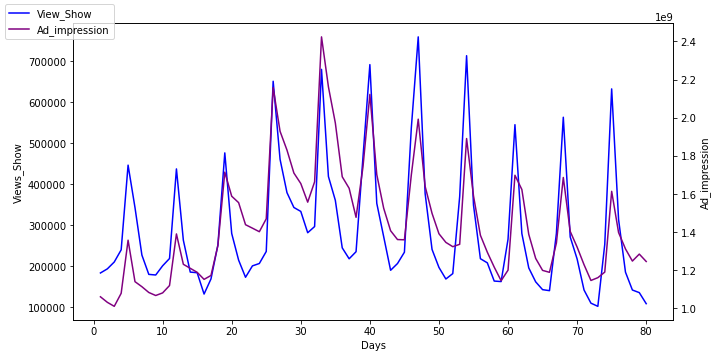

In [18]:
x = media.day
y1 = media.Views_show
y2 = media.Ad_impression

fig,ax1 = plt.subplots(figsize=[10,5])
ax1.set_xlabel("Days")
ax1.set_ylabel("Views_Show")
ax1.plot(x,y1,color="blue",label="View_Show")


ax2 = ax1.twinx() #  instantiate a second Axes that shares the same x-axis
ax2.set_ylabel("Ad_impression")
ax2.plot(x,y2,color = "purple",label="Ad_impression")


fig.legend(loc=2)
fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.show()

In [19]:
# Derived Metrics
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable

media["weekday"] = (media["day"]+3)%7
media["weekday"].replace(0,7,inplace=True)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [20]:
media.weekday.dtype

dtype('int32')

### Running first model (lm1) Weekday & visitors

In [21]:
## Putting feature variables to X 
X = media[["Visitors","weekday"]]

## Putting response variable to y
y = media["Views_show"]

In [22]:
import statsmodels.api as sm

In [23]:
X = sm.add_constant(X) # need to use the method sm.add_constant(X) in order to add a constant. 
lm1 = sm.OLS(y,X).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           8.01e-12
Time:                        23:13:21   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [24]:
media.head(2)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5


In [25]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
def condition(i):
    if i ==1:
        return 1
    elif i==7:
        return 1
    else:
        return 0

In [26]:
media["weekends"] = media["weekday"].map(condition)

In [27]:
media.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekends
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


### Running second model (lm2) visitors & weekend

In [28]:
# Running second model (lm2) visitors & weekend
## Putting feature variables to X 
X = media[["Visitors","weekends"]]

## Putting response variable to y
y = media["Views_show"]

In [29]:
X = sm.add_constant(X) # need to use the method sm.add_constant(X) in order to add a constant. 
lm2 = sm.OLS(y,X).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           2.51e-12
Time:                        23:13:22   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

### Running third model (lm3) visitors, weekend & Character_A

In [30]:
# Running second model (lm3) visitors, Character_A & weekend
## Putting feature variables to X 
X = media[["Visitors","weekends","Character_A"]]

## Putting response variable to y
y = media["Views_show"]

In [31]:
X = sm.add_constant(X) # need to use the method sm.add_constant(X) in order to add a constant. 
lm3 = sm.OLS(y,X).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.53e-14
Time:                        23:13:22   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

<AxesSubplot:>

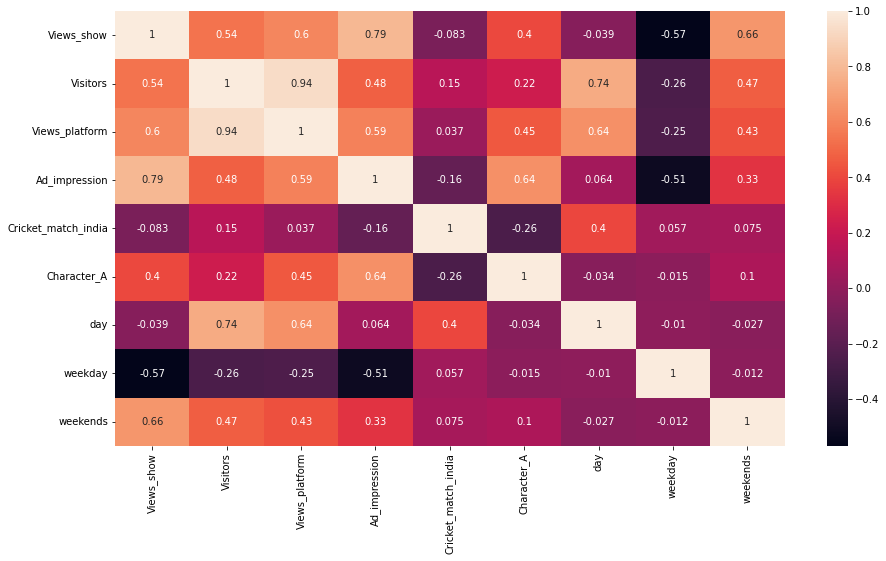

In [32]:
### Chekcing for the correlation between the variables 
plt.figure(figsize = (15,8))
sns.heatmap(media.corr(),annot=True)

### Running fourth model (lm4) Character_A, weekend & Views_platform

In [33]:
# Running second model (lm4) visitors, Character_A & weekend
## Putting feature variables to X 
X = media[["Views_platform","weekends","Character_A"]]

## Putting response variable to y
y = media["Views_show"]

In [34]:
X = sm.add_constant(X) # need to use the method sm.add_constant(X) in order to add a constant. 
lm4 = sm.OLS(y,X).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           3.59e-15
Time:                        23:13:23   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

### Running sixth model (lm5) Character_A, weekend & Visitors

In [35]:
# Running second model (lm5) visitors, Character_A & weekend
## Putting feature variables to X 
X = media[["Visitors","weekends","Character_A"]]

## Putting response variable to y
y = media["Views_show"]

In [36]:
X = sm.add_constant(X) # need to use the method sm.add_constant(X) in order to add a constant. 
lm5 = sm.OLS(y,X).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.53e-14
Time:                        23:13:23   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

### Running seventh model (lm6) Character_A, weekend, Visitors & Ad_impressions

In [37]:
# Running sixth model (lm6) visitors, Character_A & weekend
## Putting feature variables to X 
X = media[["Visitors","weekends","Character_A","Ad_impression"]]

## Putting response variable to y
y = media["Views_show"]

In [38]:
X = sm.add_constant(X) # need to use the method sm.add_constant(X) in order to add a constant. 
lm6 = sm.OLS(y,X).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.10e-25
Time:                        23:13:24   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

### Running seventh model (lm7) Character_A, weekend & Ad_impressions

In [39]:
# Running seventh model (lm7) Character_A,Ad_impression & weekend
## Putting feature variables to X 
X = media[["weekends","Character_A","Ad_impression"]]

## Putting response variable to y
y = media["Views_show"]

In [40]:
X = sm.add_constant(X) # need to use the method sm.add_constant(X) in order to add a constant. 
lm7 = sm.OLS(y,X).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.05e-26
Time:                        23:13:24   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

### Making predictions using lm7

In [41]:
X = media[["weekends","Character_A","Ad_impression"]]
X = sm.add_constant(X)
Predicted_Views = lm7.predict(X)

In [42]:
from sklearn.metrics import r2_score, mean_squared_error

In [43]:
mse=mean_squared_error(media.Views_show,Predicted_Views)
r2_mean_squared_error =  r2_score(media.Views_show,Predicted_Views)

In [46]:
print(mse,'mean_squared_error')
print(r2_mean_squared_error,"r_squared")

4677651616.253471 mean_squared_error
0.8026434468575623 r_squared


[]

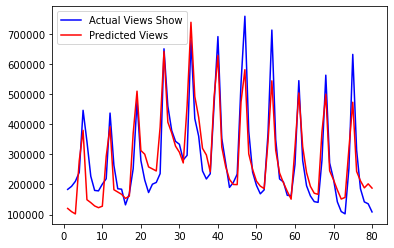

In [50]:
c= [i for i in range(1,81)]
plt.plot(c,media.Views_show,label="Actual Views Show",color='blue')
plt.plot(c,Predicted_Views,label = "Predicted Views",color = 'red')
plt.legend()
plt.plot()

##  Error Terms

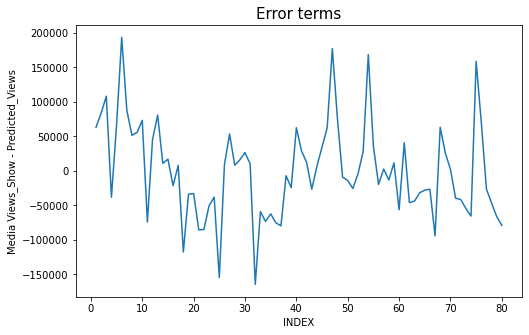

In [55]:
c= [i for i in range(1,81)]
plt.figure(figsize = (8,5))
plt.plot(c,media.Views_show-Predicted_Views)
plt.xlabel("INDEX")
plt.ylabel("Media Views_Show - Predicted_Views")
plt.title("Error terms",fontsize=15)
plt.show()